### Import Libraries

In [1]:
# Libraries for data processing and math 
import pandas as pd
import numpy as np

# Library for causal estimation 
import dowhy
from dowhy import CausalModel
import econml
from sklearn.preprocessing import MinMaxScaler
from causal_estimate import ate_estimate 

# Library for file path manipulation 
import os

# Set seed to control randomness
np.random.seed(156)

### Read Data

In [3]:
# Load the data and train the XGBoost models
root = os.path.dirname(os.getcwd())
data_dir = os.path.join(root, 'data')
### Cluster 1 Overall ###
c1_overall_path = os.path.join(data_dir, 'time_cluster_1.csv')
c1_overall = pd.read_csv(c1_overall_path)
all_vars = ['days', 'ACTV', 'TEMP', 'HUM', 'WSPD', 'PRES', 'NO2', 'O3', 'PM2.5', 'PM10', 'SO2', 'CO', 'Case']
cluster1_df = c1_overall[all_vars]
# Normalize the data 
scaler = MinMaxScaler()
normalized = scaler.fit_transform(cluster1_df.values)
cluster1_df_norm = pd.DataFrame(normalized)
cluster1_df_norm.columns = cluster1_df.columns
cluster1_df_norm.head()

,days,ACTV,TEMP,HUM,WSPD,PRES,NO2,O3,PM2.5,PM10,SO2,CO,Case
0,0.000000,0.570104,0.502793,0.993318,0.000000,0.869388,0.910256,0.425481,0.382456,0.240291,0.310345,0.491803,0.000000
1,0.012987,0.509862,0.477654,1.000000,0.000000,0.869388,0.717949,0.414663,0.266667,0.156553,0.258621,0.368852,0.063063
2,0.025974,0.441704,0.469274,0.997773,0.062016,0.889796,0.589744,0.485577,0.245614,0.203883,0.275862,0.327869,0.099099
3,0.038961,0.312268,0.446927,0.979955,0.062016,0.922449,0.371795,0.485577,0.133333,0.131068,0.241379,0.213115,0.216216
4,0.051948,0.213670,0.430168,0.975501,0.124031,0.938776,0.262821,0.512019,0.101754,0.128641,0.275862,0.196721,0.216216


### Causal Estimation for Cluster 1 Time Series

#### Step 1) Setting up the Causal Graph

C:\Users\iyerr\.conda\envs\env_causal\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
C:\Users\iyerr\.conda\envs\env_causal\lib\site-packages\networkx\drawing\nx_pylab.py:676: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cb.iterable(node_size):  # many node sizes


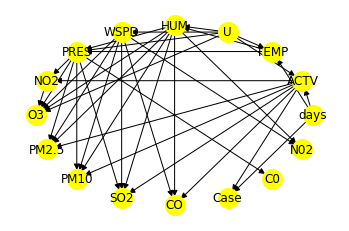

In [4]:
causal_graph = """
digraph {
days; 
ACTV; 
TEMP; 
U[label="Unobserved Confounders"];
HUM; 
WSPD; 
PRES; 
NO2; 
O3; 
PM2.5; 
PM10; 
SO2; 
CO; 
Case; 
days->ACTV; days->TEMP; days->Case; 
U->ACTV; U->TEMP; U->PRES; U->O3; U->HUM; U->WSPD; 
ACTV->NO2; ACTV->Case; ACTV->PM2.5; ACTV->PM10; ACTV->SO2; ACTV->CO; 
PRES->NO2; PRES->O3; PRES->PM2.5; PRES->PM10; PRES->SO2; PRES->C0; 
TEMP->PRES; TEMP->HUM; 
HUM->PRES; HUM->N02; HUM->O3; HUM->PM2.5; HUM->PM10; HUM->SO2; HUM->CO;
WSPD->N02; WSPD->O3; WSPD->PM2.5; WSPD->PM10; WSPD->SO2; WSPD->CO; 
NO2->O3; 
}
"""
from IPython.display import Image, display
model= CausalModel(
        data=cluster1_df,
        graph=causal_graph.replace("\n", " "),
        treatment='NO2',
        outcome='Case')
model.view_model()

#### Step 2) Estimate ATE for each treatment

In [ ]:
# ATE estimation 
treatments = ['PRES', 'TEMP', 'HUM', 'WSPD', 'NO2', 'O3', 'PM2.5', 'PM10', 'SO2', 'CO']
curr_treatments = []
ate_linear1 = []
ate_forest1 = []
for treatment in treatments:
    try:
        first, second = ate_estimate(treatment=treatment, data=cluster1_df_norm, outcome='Case', causal_graph=causal_graph)
        curr_treatments.append(treatment)
        ate_linear1.append(first)
        ate_forest1.append(second)
    except Exception as e:
        continue 
for idx in range(len(curr_treatments)):
    print(f'Treatment: {treatments[idx]}')
    print('-----------------------------')
    print(f'ATE Linear: {ate_linear1[idx]}')
    print(f'ATE Forest: {ate_forest1[idx]}')

### Causal Estimation for Cluster 2 Time Series

In [5]:
# Load the data and train the XGBoost models
root = os.path.dirname(os.getcwd())
data_dir = os.path.join(root, 'data')
### Cluster 2 Overall ###
c2_overall_path = os.path.join(data_dir, 'time_cluster_2.csv')
c2_overall = pd.read_csv(c2_overall_path)
all_vars = ['days', 'ACTV', 'TEMP', 'HUM', 'WSPD', 'PRES', 'NO2', 'O3', 'PM2.5', 'PM10', 'SO2', 'CO', 'Case']
cluster2_df = c2_overall[all_vars]
# Normalize the data 
scaler = MinMaxScaler()
normalized = scaler.fit_transform(cluster2_df.values)
cluster2_df_norm = pd.DataFrame(normalized)
cluster2_df_norm.columns = cluster2_df.columns
cluster2_df_norm.head()

,days,ACTV,TEMP,HUM,WSPD,PRES,NO2,O3,PM2.5,PM10,SO2,CO,Case
0,0.000000,0.771312,0.317460,0.739130,1.908196e-17,0.956373,0.533865,0.259179,0.286727,0.330045,0.393939,0.295238,0.000000
1,0.012987,0.702972,0.299603,0.820652,3.519062e-02,0.955090,0.450199,0.359611,0.250253,0.297758,0.339394,0.252381,0.000000
2,0.025974,0.630765,0.242063,0.757246,4.692082e-02,0.966638,0.402390,0.371490,0.225937,0.265471,0.357576,0.200000,0.000000
3,0.038961,0.514089,0.162698,0.721014,4.692082e-02,0.977759,0.414343,0.384449,0.395137,0.441256,0.660606,0.228571,0.017964
4,0.051948,0.431731,0.119048,0.576087,4.692082e-02,0.988024,0.466135,0.371490,0.529889,0.559641,0.733333,0.276190,0.023952


In [6]:
# ATE estimation 
treatments = ['PRES', 'TEMP', 'HUM', 'WSPD', 'NO2', 'O3', 'PM2.5', 'PM10', 'SO2', 'CO']
curr_treatments = []
ate_linear2 = []
ate_forest2 = []
for treatment in treatments:
    try:
        first, second = ate_estimate(treatment=treatment, data=cluster2_df_norm, outcome='Case', causal_graph=causal_graph)
        curr_treatments.append(treatment)
        ate_linear2.append(first)
        ate_forest2.append(second)
    except Exception as e:
        continue 
for idx in range(len(curr_treatments)):
    print(f'Treatment: {curr_treatments[idx]}')
    print('-----------------------------')
    print(f'ATE Linear: {ate_linear2[idx]}')
    print(f'ATE Forest: {ate_forest2[idx]}')

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:   15.4s
[Parallel(n_jobs=-1)]: Done 104 tasks      | elapsed:   47.0s
[Parallel(n_jobs=-1)]: Done 264 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:  3.3min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    4.3s
[Parallel(n_jobs=-1)]: Done 104 tasks      | elapsed:   41.2s
[Parallel(n_jobs=-1)]: Done 264 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:  3.2min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:   16.1s
[Parallel(n_jobs=-1)]: Done 104 tasks      | elapsed:   20.9s
[Parallel(n_jobs=-1)]: Done 264 tasks      | elapsed:   27.4s
[Parallel(n_jobs=-1)]: Done 488 tasks      | elapsed:   36.8s
[Parall

Treatment: PRES
-----------------------------
ATE Linear: 0.03036410104828903
ATE Forest: 0.0493888790355381
Treatment: TEMP
-----------------------------
ATE Linear: 0.01141152599450941
ATE Forest: 0.00023114908086125247
Treatment: HUM
-----------------------------
ATE Linear: 0.001422113884376925
ATE Forest: 0.002766289122497963
Treatment: WSPD
-----------------------------
ATE Linear: -0.04837908085602588
ATE Forest: -0.03859738022604581


### Causal Estimation for Cluster 3 Time Series

In [7]:
# Load the data and train the XGBoost models
root = os.path.dirname(os.getcwd())
data_dir = os.path.join(root, 'data')
### Cluster 3 Overall ###
c3_overall_path = os.path.join(data_dir, 'time_cluster_3.csv')
c3_overall = pd.read_csv(c3_overall_path)
all_vars = ['days', 'ACTV', 'TEMP', 'HUM', 'WSPD', 'PRES', 'NO2', 'O3', 'PM2.5', 'PM10', 'SO2', 'CO', 'Case']
cluster3_df = c3_overall[all_vars]
# Normalize the data 
scaler = MinMaxScaler()
normalized = scaler.fit_transform(cluster3_df.values)
cluster3_df_norm = pd.DataFrame(normalized)
cluster3_df_norm.columns = cluster3_df.columns
cluster3_df_norm.head()

,days,ACTV,TEMP,HUM,WSPD,PRES,NO2,O3,PM2.5,PM10,SO2,CO,Case
0,0.000000,0.594985,0.478723,0.748092,0.412371,0.458980,0.495798,0.244211,0.423745,0.412568,0.103321,0.302326,0.000000
1,0.012987,0.569882,0.505319,0.776718,0.324742,0.462306,0.483193,0.275789,0.446911,0.428962,0.097786,0.325581,0.000000
2,0.025974,0.516293,0.510638,0.778626,0.295533,0.476718,0.411765,0.360000,0.529923,0.487250,0.114391,0.372093,0.000000
3,0.038961,0.435802,0.514184,0.809160,0.185567,0.501109,0.323529,0.442105,0.573359,0.508197,0.125461,0.395349,0.000000
4,0.051948,0.347960,0.503546,0.832061,0.185567,0.514412,0.210084,0.513684,0.531853,0.452641,0.114391,0.364341,0.000979


In [8]:
# ATE estimation 
treatments = ['PRES', 'TEMP', 'HUM', 'WSPD', 'NO2', 'O3', 'PM2.5', 'PM10', 'SO2', 'CO']
curr_treatments = []
ate_linear3 = []
ate_forest3 = []
for treatment in treatments:
    try:
        first, second = ate_estimate(treatment=treatment, data=cluster3_df_norm, outcome='Case', causal_graph=causal_graph)
        curr_treatments.append(treatment)
        ate_linear3.append(first)
        ate_forest3.append(second)
    except Exception as e:
        continue 
for idx in range(len(curr_treatments)):
    print(f'Treatment: {curr_treatments[idx]}')
    print('-----------------------------')
    print(f'ATE Linear: {ate_linear3[idx]}')
    print(f'ATE Forest: {ate_forest3[idx]}')

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:   23.5s
[Parallel(n_jobs=-1)]: Done 104 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 264 tasks      | elapsed:  5.1min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:  9.4min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:   16.1s
[Parallel(n_jobs=-1)]: Done 104 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 264 tasks      | elapsed:  5.1min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:  9.7min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:   15.0s
[Parallel(n_jobs=-1)]: Done 104 tasks      | elapsed:   19.6s
[Parallel(n_jobs=-1)]: Done 264 tasks      | elapsed:   28.9s
[Parallel(n_jobs=-1)]: Done 488 tasks      | elapsed:   42.4s
[Parall

KeyboardInterrupt: 